## CSE 6367 Programming Assignment 4 (P4)
## Spring 2023
## Panorama

#### NOTE: This is an optional programming assignment. If you submit all 4 programming assignments, we will count your best 3 out of 4 programming assignments towards your final grade.

## Dataset

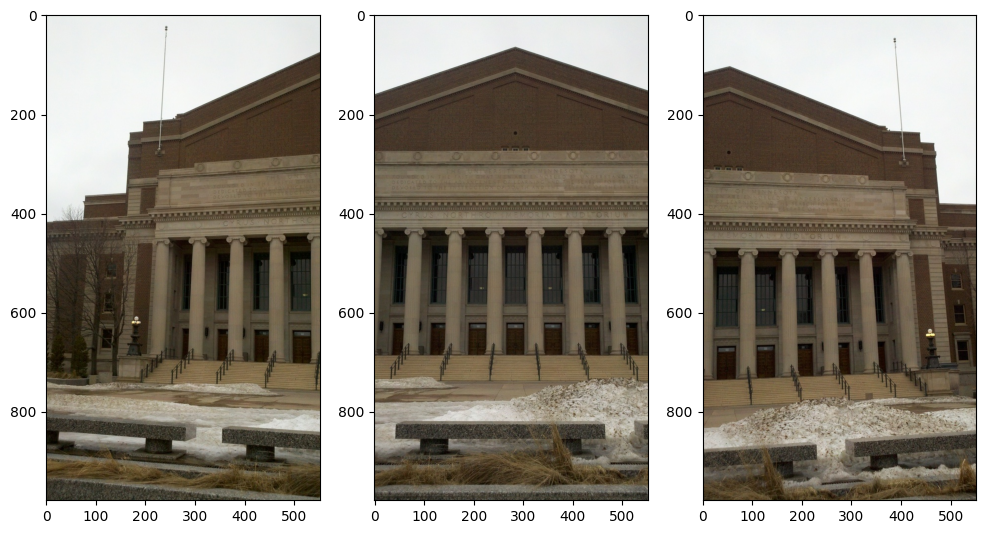

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("Images/mall1.jpg")
img2 = cv2.imread("Images/mall2.jpg")
img3 = cv2.imread("Images/mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

## Assignment Instructions:

In this assignment, you will perform image stitching and create a panorama of stitched images. Here are some basic steps you need to perform for image stiching:

    1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors
    4. Applying a warping transformation using the homography matrix obtained from Step #3
    
<b> You may use opencv or other libraries for doing different tasks of this programming assignment.<\b>

# **Detect keypoints and extract local invariant descriptors**

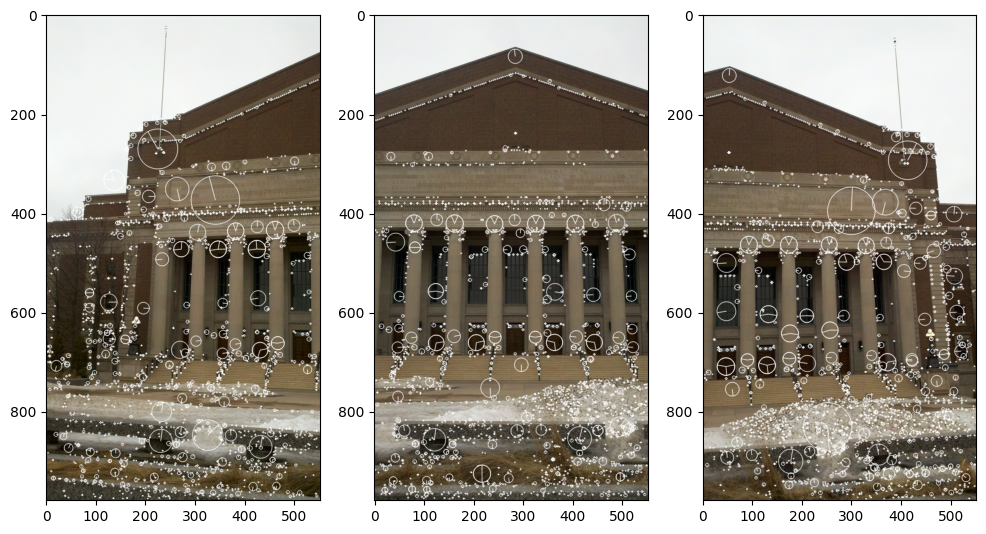

In [2]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
kp3, des3 = sift.detectAndCompute(img3, None)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv2.drawKeypoints(img1, kp1, None, (255, 255, 255), 4))
ax[1].imshow(cv2.drawKeypoints(img2, kp2, None, (255, 255, 255), 4))
ax[2].imshow(cv2.drawKeypoints(img3, kp3, None, (255, 255, 255), 4))

# **Matching the descriptors between the images**

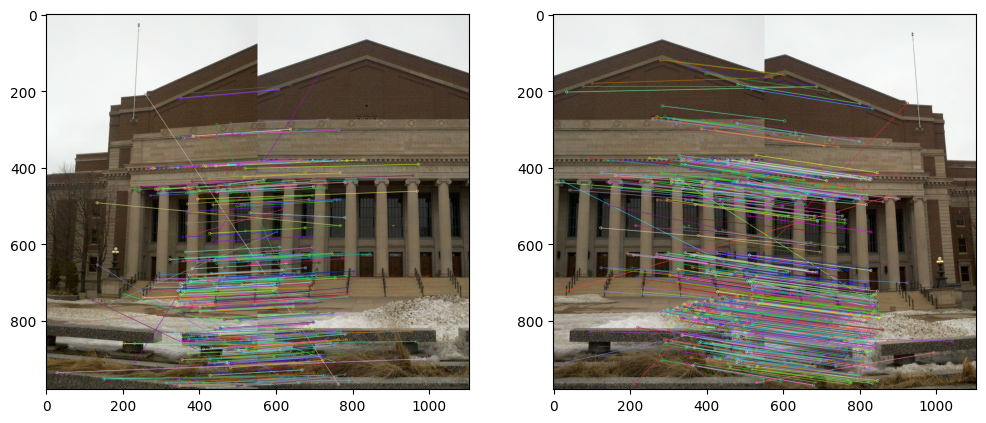

In [3]:
bf = cv2.BFMatcher()

matches_img1_img2 = bf.knnMatch(des1, des2, k=2)
matches_img2_img3 = bf.knnMatch(des2, des3, k=2)

RATIO = .75
ratio_test_img1_img2 = list([m] for m, n in matches_img1_img2 if m.distance < RATIO * n.distance)
ratio_test_img2_img3 = list([m] for m, n in matches_img2_img3 if m.distance < RATIO * n.distance)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.drawMatchesKnn(img1, kp1, img2, kp2, ratio_test_img1_img2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
ax[1].imshow(cv2.drawMatchesKnn(img2, kp2, img3, kp3, ratio_test_img2_img3, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))

# **Estimate a homography matrix using our matched feature vectors**

In [4]:
import numpy as np

MINIMUM_MATCHES = 5
ALGORITHM = cv2.RANSAC
REPROJECTION_THRESHOLD = 5.0

if len(matches_img1_img2) >= MINIMUM_MATCHES:
  P_left = np.float32(list(kp1[m.queryIdx].pt for m, _ in matches_img1_img2))
  P_right = np.float32(list(kp2[n.trainIdx].pt for _, n in matches_img1_img2))

  H_img1_img2, _ = cv2.findHomography(P_left, P_right, ALGORITHM, REPROJECTION_THRESHOLD)
  print("Homography matrix of img1, img2:", H_img1_img2, sep='\n', end='\n\n') # DEBUG

if len(matches_img2_img3) >= MINIMUM_MATCHES:
  P_left = np.float32(list(kp2[m.queryIdx].pt for m, _ in matches_img2_img3))
  P_right = np.float32(list(kp3[n.trainIdx].pt for _, n in matches_img2_img3))

  H_img2_img3, _ = cv2.findHomography(P_left, P_right, ALGORITHM, REPROJECTION_THRESHOLD)
  print("Homography matrix of img2, img3:", H_img2_img3, sep='\n', end='\n\n') # DEBUG

Homography matrix of img1, img2:
[[-4.78187330e-01  3.20042170e-01 -3.90713263e+02]
 [-1.63819490e+00 -3.42779546e+00  1.36228051e+03]
 [-3.99509740e-03 -2.82008013e-03  1.00000000e+00]]

Homography matrix of img2, img3:
[[-2.15476913e-01 -4.11719417e-02  1.75212295e+02]
 [-3.91563546e-01 -1.51249685e-01  3.90752041e+02]
 [-9.30869669e-04 -5.53314069e-04  1.00000000e+00]]



#### **Applying a warping transformation using the homography matrix obtained from previous cell**

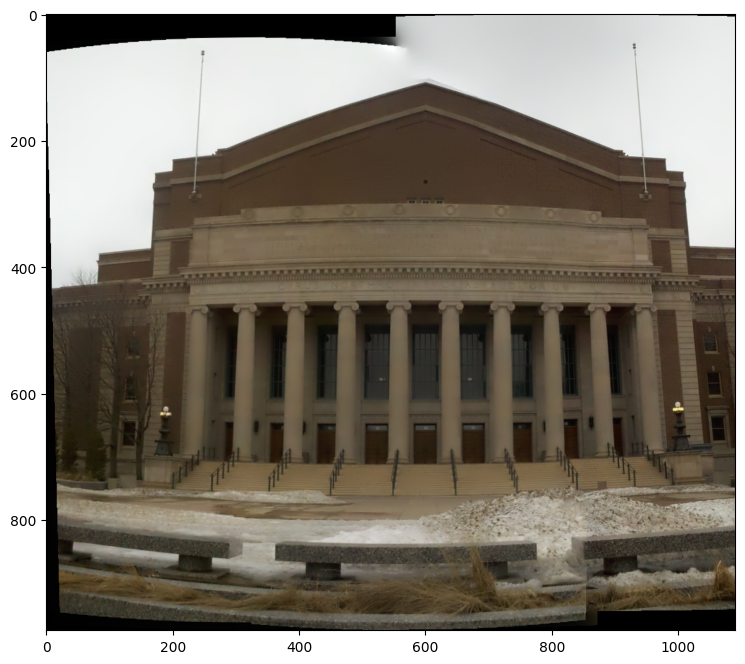

In [5]:
stitcher = cv2.Stitcher_create()

stitching_image_buffer = stitcher.stitch([img1, img2], H_img1_img2)[1]
stitching_image_buffer = stitcher.stitch([stitching_image_buffer, img3], H_img2_img3)[1]

plt.imshow(stitching_image_buffer)
plt.show()

### Submission Guidelines:
        
        Submit through Canvas your source code in a single .ipynb file. 
        The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
        The images are available in the ./Images directory. Your TA will use the same directory name to grade your submission.
        You don't need to attach the images folder with your submission.